Summary of this notebook: cleaned the data, found high and low roi groups of movies with budgets of $1,800,000 and less (that is the highest budget in the  high roi movie group). Compared the groups- there was no difference in average 'vote' rating between the groups, the genres, adventure, animation, family and history, were more likely to be found in the high roi group than in the low roi group. There are too many keywords to get any ineresting insights from them. 

In [1]:
import pandas as pd

In [2]:
tmdb_df = pd.read_csv('../data/tmdb_5000_movies.csv.zip')

In [3]:
tmdb_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#drop columns I know I won't be using
tmdb_df = tmdb_df.drop(columns = ['homepage', 'original_title', 'status', 'tagline'])

In [5]:
tmdb_df.head()

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


In [6]:
tmdb_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
#how many films have a zero budget?
tmdb_df['budget'].value_counts()

0            1037
20000000      144
30000000      128
25000000      126
40000000      123
             ... 
280000000       1
2053648         1
85000           1
52500000        1
40600000        1
Name: budget, Length: 436, dtype: int64

In [8]:
#drop films without budget data
tmdb_df = tmdb_df[tmdb_df['budget'] != 0]

In [9]:
#do any remaining films not have revenue data
tmdb_df['revenue'].value_counts()

0            537
8000000        6
12000000       5
100000000      5
6000000        5
            ... 
84460846       1
156505388      1
146292009      1
38413606       1
33754967       1
Name: revenue, Length: 3155, dtype: int64

In [10]:
#remove films without revenue data
tmdb_df = tmdb_df[tmdb_df['revenue'] != 0]

In [11]:
#add column for ROI
tmdb_df['roi'] = tmdb_df['revenue'] / tmdb_df['budget']
tmdb_df.head(10)

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,roi
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,11.763566
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,3.203333
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,3.594590
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,4.339756
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,1.092843
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Spider-Man 3,5.9,3576,3.452991
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Tangled,7.4,3330,2.276134
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Avengers: Age of Ultron,7.3,6767,5.019299
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United King

In [12]:
tmdb_df['roi'].describe()

count    3.229000e+03
mean     2.954822e+03
std      1.506101e+05
min      5.217391e-07
25%      1.022463e+00
50%      2.300366e+00
75%      4.420822e+00
max      8.500000e+06
Name: roi, dtype: float64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

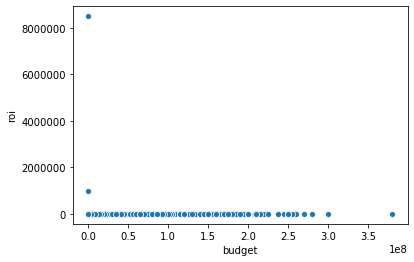

In [14]:
sns.scatterplot(data = tmdb_df, x = 'budget', y = 'roi')

In [15]:
#what movies are those outliers in roi
tmdb_df[tmdb_df['roi'] > 500000]

,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,roi
3137,10,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",78383,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 7098, ""n...",en,"Abby Russell, a beautiful, dedicated nurse wit...",10.013629,"[{""name"": ""Lions Gate"", ""id"": 6644}, {""name"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-09-28,10000000,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Nurse 3-D,4.9,119,1000000.0
4238,1,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",3082,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,...",en,The Tramp struggles to live in modern industri...,28.276480,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1936-02-05,8500000,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Modern Times,8.1,856,8500000.0


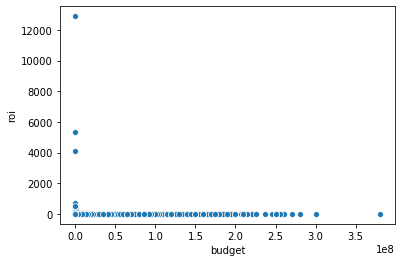

In [16]:
#scatterplot without the outliers

sns.scatterplot(data = tmdb_df[tmdb_df['roi'] < 500000], x = 'budget', y = 'roi')

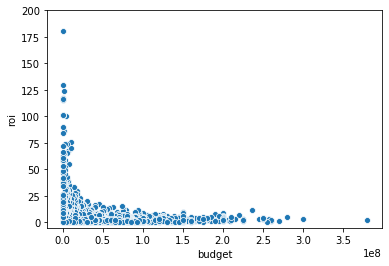

In [17]:
#zoom in on scatterplot
plt.ylim(-5, 200)
sns.scatterplot(data = tmdb_df[tmdb_df['roi'] < 500000], x = 'budget', y = 'roi')

In [18]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 17 columns):
budget                  3229 non-null int64
genres                  3229 non-null object
id                      3229 non-null int64
keywords                3229 non-null object
original_language       3229 non-null object
overview                3229 non-null object
popularity              3229 non-null float64
production_companies    3229 non-null object
production_countries    3229 non-null object
release_date            3229 non-null object
revenue                 3229 non-null int64
runtime                 3229 non-null float64
spoken_languages        3229 non-null object
title                   3229 non-null object
vote_average            3229 non-null float64
vote_count              3229 non-null int64
roi                     3229 non-null float64
dtypes: float64(4), int64(4), object(9)
memory usage: 454.1+ KB


In [19]:
#convert release date object to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [20]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 17 columns):
budget                  3229 non-null int64
genres                  3229 non-null object
id                      3229 non-null int64
keywords                3229 non-null object
original_language       3229 non-null object
overview                3229 non-null object
popularity              3229 non-null float64
production_companies    3229 non-null object
production_countries    3229 non-null object
release_date            3229 non-null datetime64[ns]
revenue                 3229 non-null int64
runtime                 3229 non-null float64
spoken_languages        3229 non-null object
title                   3229 non-null object
vote_average            3229 non-null float64
vote_count              3229 non-null int64
roi                     3229 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(8)
memory usage: 454.1+ KB


In [21]:
#reording the columns to make it easier to find info
list(tmdb_df.columns.values)

['budget',
 'genres',
 'id',
 'keywords',
 'original_language',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'title',
 'vote_average',
 'vote_count',
 'roi']

In [22]:
tmdb_df = tmdb_df[['budget', 'revenue', 'roi', 'title', 'release_date', 'genres', 'keywords', 'vote_average', 'vote_count',  'original_language', 'production_countries', 'production_companies','popularity',  'overview','runtime', 'spoken_languages', 'id']]

In [23]:
tmdb_df.head()

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
0,237000000,2787965087,11.763566,Avatar,2009-12-10,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",7.2,11800,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",150.437577,"In the 22nd century, a paraplegic Marine is di...",162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",19995
1,300000000,961000000,3.203333,Pirates of the Caribbean: At World's End,2007-05-19,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",6.9,4500,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",139.082615,"Captain Barbossa, long believed to be dead, ha...",169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",285
2,245000000,880674609,3.594590,Spectre,2015-10-26,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",6.3,4466,en,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",107.376788,A cryptic message from Bond’s past sends him o...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",206647
3,250000000,1084939099,4.339756,The Dark Knight Rises,2012-07-16,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",7.6,9106,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",112.312950,Following the death of District Attorney Harve...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",49026
4,260000000,284139100,1.092843,John Carter,2012-03-07,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",6.1,2124,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",43.926995,"John Carter is a war-weary, former military ca...",132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",49529


In [24]:
#create df for high roi films and low roi films
low_roi_df = tmdb_df[tmdb_df['roi'] < 25]
high_roi_df = tmdb_df[tmdb_df['roi'] >= 25]

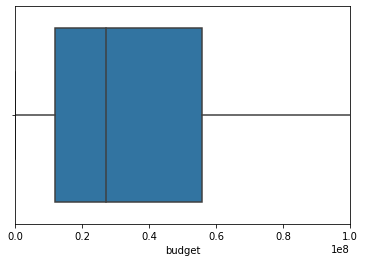

In [25]:
#boxplot to see distribution of budget for low roi films
plt.xlim(0, 100000000)
sns.boxplot(low_roi_df['budget'])

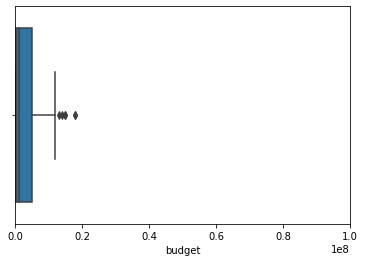

In [26]:
#boxplot to seee distribution of budget for high roi films
plt.xlim(0, 100000000)
sns.boxplot(high_roi_df['budget'])

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

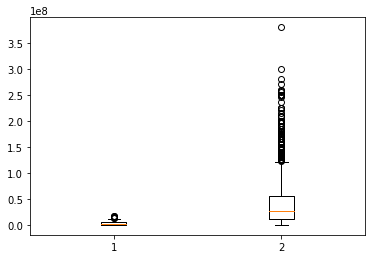

In [27]:
#just playing with the plots on the same fig- will come back to this for final
fig, ax = plt.subplots()
data = [high_roi_df['budget'], low_roi_df['budget']] 
ax.boxplot(data)
plt.show

In [28]:
high_roi_df['budget'].describe()

count    9.100000e+01
mean     3.275754e+06
std      4.312824e+06
min      1.000000e+00
25%      2.225000e+05
50%      1.200000e+06
75%      5.000000e+06
max      1.800000e+07
Name: budget, dtype: float64

In [29]:
low_roi_df['budget'].describe()

count    3.138000e+03
mean     4.173840e+07
std      4.456467e+07
min      4.000000e+00
25%      1.200000e+07
50%      2.700000e+07
75%      5.575000e+07
max      3.800000e+08
Name: budget, dtype: float64

The max budget in the high roi group is 1,800,000, while the 25% quartile of the low group is just below that at 1,200,000, so I will use the max budgete in the high roi group (to keep that dataset whole) as the cutoff to look at the differences between movies with lower budgets that have high or low rois.

In [30]:
#checking size of the new datasteam
low_roi_df[low_roi_df['budget'] <= 1800000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 1243 to 4798
Data columns (total 17 columns):
budget                  145 non-null int64
revenue                 145 non-null int64
roi                     145 non-null float64
title                   145 non-null object
release_date            145 non-null datetime64[ns]
genres                  145 non-null object
keywords                145 non-null object
vote_average            145 non-null float64
vote_count              145 non-null int64
original_language       145 non-null object
production_countries    145 non-null object
production_companies    145 non-null object
popularity              145 non-null float64
overview                145 non-null object
runtime                 145 non-null float64
spoken_languages        145 non-null object
id                      145 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(8)
memory usage: 20.4+ KB


In [31]:
low_roi_df = low_roi_df[low_roi_df['budget'] <= 1800000]

In [32]:
high_roi_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 1108 to 4796
Data columns (total 17 columns):
budget                  91 non-null int64
revenue                 91 non-null int64
roi                     91 non-null float64
title                   91 non-null object
release_date            91 non-null datetime64[ns]
genres                  91 non-null object
keywords                91 non-null object
vote_average            91 non-null float64
vote_count              91 non-null int64
original_language       91 non-null object
production_countries    91 non-null object
production_companies    91 non-null object
popularity              91 non-null float64
overview                91 non-null object
runtime                 91 non-null float64
spoken_languages        91 non-null object
id                      91 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(8)
memory usage: 12.8+ KB


In [33]:
high_roi_df.head()

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
1108,2600000,84300000,32.423077,Pinocchio,1940-02-23,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 131, ""name"": ""italy""}, {""id"": 2251, ""n...",6.9,1355,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""RKO Radio Pictures"", ""id"": 6}, {""na...",46.007991,Lonely toymaker Geppetto has his wishes answer...,88.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10895
1990,18000000,538400000,29.911111,The Empire Strikes Back,1980-05-17,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 526, ""name"": ""rebel""}, {""id"": 803, ""na...",8.2,5879,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...",78.517830,"The epic saga continues as Luke Skywalker, in ...",124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1891
2170,806948,32000000,39.655591,Psycho,1960-06-16,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...","[{""id"": 612, ""name"": ""hotel""}, {""id"": 1443, ""n...",8.2,2320,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",93.067866,When larcenous real estate clerk Marion Crane ...,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",539
2409,300000,70000000,233.333333,Halloween,1978-10-25,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...","[{""id"": 293, ""name"": ""female nudity""}, {""id"": ...",7.4,1035,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Compass International Pictures"", ""i...",30.301307,"In John Carpenter's horror classic, a psychoti...",91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",948
2511,18000000,476684675,26.482482,Home Alone,1990-11-09,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...","[{""id"": 65, ""name"": ""holiday""}, {""id"": 1437, ""...",7.1,2414,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",2.186927,Eight-year-old Kevin McCallister makes the mos...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",771


In [34]:
import ast

In [35]:
# get genre and keyword 'name's from dictionary to a list and then to columns with boolean
#genres = high_roi_df['genres']

#type(high_roi_df['keywords'][1108])
df_head = high_roi_df.head()

df_head.index

Int64Index([1108, 1990, 2170, 2409, 2511], dtype='int64')

In [36]:
genres_list = []
for row in df_head.index:
    # first need to convert the strings to dictionarys!
    genre_dict = ast.literal_eval(df_head['genres'][row])
    #create list of values from key "name"
    genres_list = [genre.get("name") for genre in genre_dict]
    #replace the column value with the new list
    df_head['genres'][row] = genres_list


/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
df_head

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
1108,2600000,84300000,32.423077,Pinocchio,1940-02-23,"[Animation, Family]","[{""id"": 131, ""name"": ""italy""}, {""id"": 2251, ""n...",6.9,1355,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""RKO Radio Pictures"", ""id"": 6}, {""na...",46.007991,Lonely toymaker Geppetto has his wishes answer...,88.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10895
1990,18000000,538400000,29.911111,The Empire Strikes Back,1980-05-17,"[Adventure, Action, Science Fiction]","[{""id"": 526, ""name"": ""rebel""}, {""id"": 803, ""na...",8.2,5879,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...",78.517830,"The epic saga continues as Luke Skywalker, in ...",124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1891
2170,806948,32000000,39.655591,Psycho,1960-06-16,"[Drama, Horror, Thriller]","[{""id"": 612, ""name"": ""hotel""}, {""id"": 1443, ""n...",8.2,2320,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",93.067866,When larcenous real estate clerk Marion Crane ...,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",539
2409,300000,70000000,233.333333,Halloween,1978-10-25,"[Horror, Thriller]","[{""id"": 293, ""name"": ""female nudity""}, {""id"": ...",7.4,1035,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Compass International Pictures"", ""i...",30.301307,"In John Carpenter's horror classic, a psychoti...",91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",948
2511,18000000,476684675,26.482482,Home Alone,1990-11-09,"[Comedy, Family]","[{""id"": 65, ""name"": ""holiday""}, {""id"": 1437, ""...",7.1,2414,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",2.186927,Eight-year-old Kevin McCallister makes the mos...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",771


In [38]:
#write a function that will turn each string/dictionary column into lists

def str_dict_to_list(column, dataframe) :
    names_list = []
    for row in dataframe.index:
        str_to_dict = ast.literal_eval(dataframe[column][row])
        names_list = [name.get("name") for name in str_to_dict]
        dataframe[column][row] = names_list

In [39]:
str_dict_to_list('keywords', df_head)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_head

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
1108,2600000,84300000,32.423077,Pinocchio,1940-02-23,"[Animation, Family]","[italy, lie, magic, fairy, pinocchio, carnival...",6.9,1355,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""RKO Radio Pictures"", ""id"": 6}, {""na...",46.007991,Lonely toymaker Geppetto has his wishes answer...,88.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10895
1990,18000000,538400000,29.911111,The Empire Strikes Back,1980-05-17,"[Adventure, Action, Science Fiction]","[rebel, android, asteroid, space battle, snow ...",8.2,5879,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...",78.517830,"The epic saga continues as Luke Skywalker, in ...",124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1891
2170,806948,32000000,39.655591,Psycho,1960-06-16,"[Drama, Horror, Thriller]","[hotel, clerk, arizona, shower, rain, motel, m...",8.2,2320,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",93.067866,When larcenous real estate clerk Marion Crane ...,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",539
2409,300000,70000000,233.333333,Halloween,1978-10-25,"[Horror, Thriller]","[female nudity, nudity, mask, babysitter, hall...",7.4,1035,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Compass International Pictures"", ""i...",30.301307,"In John Carpenter's horror classic, a psychoti...",91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",948
2511,18000000,476684675,26.482482,Home Alone,1990-11-09,"[Comedy, Family]","[holiday, burglar, home invasion, mischief, bo...",7.1,2414,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Twentieth Century Fox Film Corporat...",2.186927,Eight-year-old Kevin McCallister makes the mos...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",771


In [41]:
str_dict_to_list('genres', low_roi_df)
low_roi_df.head()

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
1243,500000,3000000,6.000000,Mean Streets,1973-10-02,"[Drama, Crime]","[{""id"": 1944, ""name"": ""epilepsy""}, {""id"": 2236...",7.2,345,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Scorsese Productions"", ""id"": 120}]",17.002096,"A small-time hood must choose from among love,...",110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",203
1378,1800000,25504513,14.169174,A Nightmare on Elm Street,1984-11-14,[Horror],"[{""id"": 1468, ""name"": ""child murderer""}, {""id""...",7.2,1180,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...",38.204158,Teenagers in a small town are dropping like fl...,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",377
1562,30,103,3.433333,Rugrats in Paris: The Movie,2000-09-14,"[Adventure, Animation, Comedy, Family]","[{""id"": 90, ""name"": ""paris""}, {""id"": 3338, ""na...",6.0,100,it,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...","[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",4.590277,The Rugrats are back! There's Tommy the brave ...,78.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",16340
1771,28,14,0.500000,The 51st State,2001-12-07,"[Thriller, Action, Comedy, Crime]","[{""id"": 852, ""name"": ""chemical""}, {""id"": 21540...",5.9,173,en,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...","[{""name"": ""Film Council"", ""id"": 246}, {""name"":...",9.670031,Elmo McElroy is a streetwise American master c...,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1613
1912,25,13,0.520000,Angela's Ashes,1999-12-25,[Drama],"[{""id"": 1625, ""name"": ""emigration""}, {""id"": 18...",7.0,59,en,"[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}, {""is...","[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",4.887940,Based on the best selling autobiography by Iri...,145.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10397


In [42]:
low_roi_df.tail()

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
4703,150000,2891288,19.275253,Tadpole,2002-11-01,"[Comedy, Drama, Romance]","[{""id"": 10183, ""name"": ""independent film""}]",5.5,19,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""IFC Productions"", ""id"": 26468}, {""n...",8.570328,"Beautiful, sophisticated women are all over Os...",78.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",39141
4752,65000,416498,6.407662,Tiny Furniture,2010-11-12,"[Romance, Comedy, Drama]","[{""id"": 1156, ""name"": ""sister sister relations...",5.6,59,en,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Tiny Ponies"", ""id"": 65873}]",2.380332,"After graduating from film school, Aura return...",99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",47607
4772,31192,10000,0.320595,Down Terrace,2009-09-01,"[Drama, Action, Comedy]","[{""id"": 9826, ""name"": ""murder""}, {""id"": 10123,...",6.3,26,en,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",[],1.330379,After serving jail time for a mysterious crime...,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",42151
4792,20000,99000,4.950000,Cure,1997-11-06,"[Crime, Horror, Mystery, Thriller]","[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",7.4,63,ja,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]","[{""name"": ""Daiei Studios"", ""id"": 881}]",0.212443,A wave of gruesome murders is sweeping Tokyo. ...,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",36095
4798,220000,2040920,9.276909,El Mariachi,1992-09-04,"[Action, Crime, Thriller]","[{""id"": 5616, ""name"": ""united states\u2013mexi...",6.6,238,es,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...","[{""name"": ""Columbia Pictures"", ""id"": 5}]",14.269792,El Mariachi just wants to play his guitar and ...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",9367


In [43]:
high_roi_df['genres'].head(10)

1108                                  [Animation, Family]
1990                 [Adventure, Action, Science Fiction]
2170                            [Drama, Horror, Thriller]
2409                                   [Horror, Thriller]
2511                                     [Comedy, Family]
2517    [{"id": 18, "name": "Drama"}, {"id": 36, "name...
2666    [{"id": 18, "name": "Drama"}, {"id": 10749, "n...
2668    [{"id": 10749, "name": "Romance"}, {"id": 35, ...
2730    [{"id": 18, "name": "Drama"}, {"id": 53, "name...
2808    [{"id": 18, "name": "Drama"}, {"id": 27, "name...
Name: genres, dtype: object

In [44]:
str_dict_to_list('genres', high_roi_df[5:])


/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
str_dict_to_list('keywords', high_roi_df[5:])
str_dict_to_list('production_countries', high_roi_df)
str_dict_to_list('production_companies', high_roi_df)
str_dict_to_list('spoken_languages', high_roi_df)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide

In [46]:
high_roi_df.head()

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
1108,2600000,84300000,32.423077,Pinocchio,1940-02-23,"[Animation, Family]","[italy, lie, magic, fairy, pinocchio, carnival...",6.9,1355,en,[United States of America],"[RKO Radio Pictures, Walt Disney Productions]",46.007991,Lonely toymaker Geppetto has his wishes answer...,88.0,[English],10895
1990,18000000,538400000,29.911111,The Empire Strikes Back,1980-05-17,"[Adventure, Action, Science Fiction]","[rebel, android, asteroid, space battle, snow ...",8.2,5879,en,[United States of America],"[Lucasfilm, Twentieth Century Fox Film Corpora...",78.517830,"The epic saga continues as Luke Skywalker, in ...",124.0,[English],1891
2170,806948,32000000,39.655591,Psycho,1960-06-16,"[Drama, Horror, Thriller]","[hotel, clerk, arizona, shower, rain, motel, m...",8.2,2320,en,[United States of America],"[Paramount Pictures, Universal Pictures, Shaml...",93.067866,When larcenous real estate clerk Marion Crane ...,109.0,[English],539
2409,300000,70000000,233.333333,Halloween,1978-10-25,"[Horror, Thriller]","[female nudity, nudity, mask, babysitter, hall...",7.4,1035,en,[United States of America],"[Compass International Pictures, Falcon Intern...",30.301307,"In John Carpenter's horror classic, a psychoti...",91.0,[English],948
2511,18000000,476684675,26.482482,Home Alone,1990-11-09,"[Comedy, Family]","[holiday, burglar, home invasion, mischief, bo...",7.1,2414,en,[United States of America],"[Twentieth Century Fox Film Corporation, Hughe...",2.186927,Eight-year-old Kevin McCallister makes the mos...,103.0,[English],771


In [47]:
str_dict_to_list('keywords', low_roi_df)
str_dict_to_list('production_countries', low_roi_df)
str_dict_to_list('production_companies', low_roi_df)
str_dict_to_list('spoken_languages', low_roi_df)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
low_roi_df.sort_values(by = ['release_date']).tail(5)

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,original_language,production_countries,production_companies,popularity,overview,runtime,spoken_languages,id
4299,1200000,2861020,2.384183,Home Run,2013-04-19,[Drama],[baseball],6.3,24,en,[United States of America],"[Samuel Goldwyn, Provident Films]",3.085411,A pro ball player with a substance abuse probl...,114.0,"[English, Deutsch]",176124
4229,1500000,3566225,2.377483,The To Do List,2013-07-24,"[Comedy, Romance]","[sex, sexuality, irony, sarcasm, naivety, blac...",5.5,342,en,[United States of America],"[3 Arts Entertainment, The Mark Gordon Company]",15.017068,Feeling pressured to become more sexually expe...,104.0,[English],129139
4647,250000,56825,0.227300,The Canyons,2013-07-29,"[Thriller, Drama]","[sex, adultery, jealousy, nudity, seduction, c...",4.1,75,en,[United States of America],"[Filmworks/FX, Prettybird, Post Empire Films, ...",6.978907,The discovery of an illicit love affair leads ...,99.0,[English],109729
3131,10,11,1.100000,Of Horses and Men,2013-08-30,"[Drama, Romance, Comedy]","[horse, snow storm, icelandic]",6.9,26,is,"[Norway, Iceland]","[Filmhuset Gruppen, Leiknar Myndir]",1.617943,A country romance about the human streak in th...,85.0,"[English, Íslenska, Pусский, Español, svenska]",217708
4198,1000000,4235151,4.235151,The Lunchbox,2013-09-19,"[Drama, Romance]",[],7.3,221,hi,"[India, France, Germany]",[UTV Motion Pictures],14.017809,A mistaken delivery in Mumbai's famously effic...,104.0,"[English, हिन्दी]",191714


In [49]:
#do low roi movies get lower ratings than high roi movies?

low_roi_df['vote_average'].describe()

count    145.000000
mean       6.545517
std        1.005262
min        0.000000
25%        6.100000
50%        6.700000
75%        7.200000
max        8.200000
Name: vote_average, dtype: float64

In [50]:
high_roi_df['vote_average'].describe()

count    91.000000
mean      6.843956
std       0.883328
min       4.300000
25%       6.400000
50%       7.000000
75%       7.400000
max       8.400000
Name: vote_average, dtype: float64

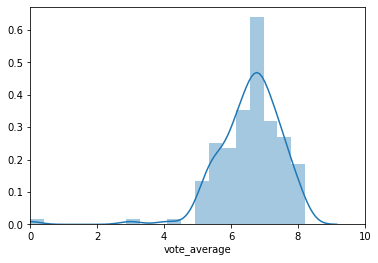

In [51]:
plt.xlim(0, 10)
sns.distplot(low_roi_df['vote_average'])

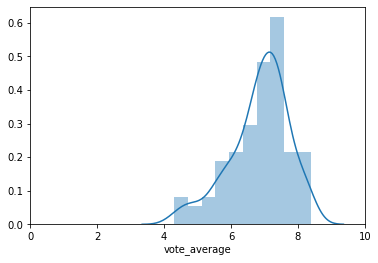

In [52]:
plt.xlim(0, 10)
sns.distplot(high_roi_df['vote_average'])

In [53]:
low_roi_df['vote_count'].describe()

count     145.000000
mean      282.427586
std       518.181151
min         0.000000
25%        29.000000
50%       111.000000
75%       275.000000
max      3697.000000
Name: vote_count, dtype: float64

In [54]:
high_roi_df['vote_count'].describe()

count      91.000000
mean     1238.032967
std      1504.572560
min         5.000000
25%       344.500000
50%       722.000000
75%      1577.000000
max      8428.000000
Name: vote_count, dtype: float64

In [55]:
#limit to movies with >100 ratings
low_roi_df[low_roi_df['vote_count'] >= 100]['vote_average'].describe()

count    77.000000
mean      6.861039
std       0.731465
min       5.100000
25%       6.400000
50%       6.900000
75%       7.400000
max       8.200000
Name: vote_average, dtype: float64

In [56]:
high_roi_df[high_roi_df['vote_count'] >= 100]['vote_average'].describe()

count    80.000000
mean      6.896250
std       0.829892
min       4.600000
25%       6.500000
50%       7.000000
75%       7.425000
max       8.400000
Name: vote_average, dtype: float64

The high ROI movies don't have significantly better ratings, especially when limited to movies with at least 100 ratings

In [57]:
low_roi_df.isna().sum()

budget                  0
revenue                 0
roi                     0
title                   0
release_date            0
genres                  0
keywords                0
vote_average            0
vote_count              0
original_language       0
production_countries    0
production_companies    0
popularity              0
overview                0
runtime                 0
spoken_languages        0
id                      0
dtype: int64

In [58]:
high_roi_df.isna().sum()

budget                  0
revenue                 0
roi                     0
title                   0
release_date            0
genres                  0
keywords                0
vote_average            0
vote_count              0
original_language       0
production_countries    0
production_companies    0
popularity              0
overview                0
runtime                 0
spoken_languages        0
id                      0
dtype: int64

In [80]:
low_roi_df['genres'].head

<bound method NDFrame.head of 1243                            [Drama, Crime]
1378                                  [Horror]
1562    [Adventure, Animation, Comedy, Family]
1771         [Thriller, Action, Comedy, Crime]
1912                                   [Drama]
                         ...                  
4703                  [Comedy, Drama, Romance]
4752                  [Romance, Comedy, Drama]
4772                   [Drama, Action, Comedy]
4792        [Crime, Horror, Mystery, Thriller]
4798                 [Action, Crime, Thriller]
Name: genres, Length: 145, dtype: object>

In [85]:
low_genres_list = []
for row in low_roi_df['genres']:
    for item in row:
        low_genres_list.append(item)

        
low_genres_list = sorted(list(set(low_genres_list)))

In [86]:
low_genres_list

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western']

In [87]:
high_genres_list = []
for row in high_roi_df['genres']:
    for item in row:
        high_genres_list.append(item)
        
high_genres_list = sorted(list(set(high_genres_list)))

In [88]:
high_genres_list

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western']

In [92]:
low_genres_df = pd.DataFrame(low_roi_df['genres'])
low_genres_df.head()

,genres
1243,"[Drama, Crime]"
1378,[Horror]
1562,"[Adventure, Animation, Comedy, Family]"
1771,"[Thriller, Action, Comedy, Crime]"
1912,[Drama]


In [93]:
high_genres_df = pd.DataFrame(high_roi_df['genres'])
high_genres_df.head()

,genres
1108,"[Animation, Family]"
1990,"[Adventure, Action, Science Fiction]"
2170,"[Drama, Horror, Thriller]"
2409,"[Horror, Thriller]"
2511,"[Comedy, Family]"


In [94]:
for col in low_genres_list:
    low_genres_df[col] = 0
low_genres_df.head()

,genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
1243,"[Drama, Crime]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1378,[Horror],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1562,"[Adventure, Animation, Comedy, Family]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1771,"[Thriller, Action, Comedy, Crime]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1912,[Drama],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
for col in high_genres_list:
    high_genres_df[col] = 0
high_genres_df.head()

,genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
1108,"[Animation, Family]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1990,"[Adventure, Action, Science Fiction]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2170,"[Drama, Horror, Thriller]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2409,"[Horror, Thriller]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2511,"[Comedy, Family]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
for row in high_genres_df.index:
    for genre in high_genres_list:
        if genre in high_genres_df['genres'][row]:
            high_genres_df[genre][row]  = 1
high_genres_df.head()

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
1108,"[Animation, Family]",0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1990,"[Adventure, Action, Science Fiction]",1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2170,"[Drama, Horror, Thriller]",0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2409,"[Horror, Thriller]",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2511,"[Comedy, Family]",0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [97]:
for row in low_genres_df.index:
    for genre in low_genres_list:
        if genre in low_genres_df['genres'][row]:
            low_genres_df[genre][row]  = 1
low_genres_df.head()

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
1243,"[Drama, Crime]",0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1378,[Horror],0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1562,"[Adventure, Animation, Comedy, Family]",0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1771,"[Thriller, Action, Comedy, Crime]",1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1912,[Drama],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
low_genres_mean = pd.DataFrame(low_genres_df.mean(), columns = ['percent_of_movies'])
high_genres_mean = pd.DataFrame(high_genres_df.mean(), columns = ['percent_of_movies'])
high_genres_mean.head()


,percent_of_movies
Action,0.098901
Adventure,0.120879
Animation,0.043956
Comedy,0.274725
Crime,0.076923


In [99]:
low_genres_mean.head()

,percent_of_movies
Action,0.124138
Adventure,0.034483
Animation,0.013793
Comedy,0.296552
Crime,0.172414


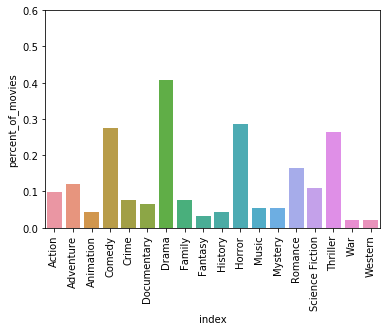

In [100]:
plt.ylim(0, 0.6)
plt.xticks(rotation = 90)
sns.barplot(data = high_genres_mean.reset_index(), x = 'index', y = 'percent_of_movies')

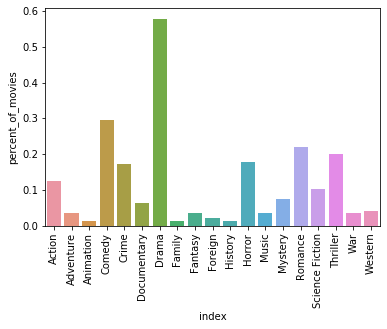

In [101]:
plt.xticks(rotation=90)
sns.barplot(data = low_genres_mean.reset_index(), x = 'index', y = 'percent_of_movies')

In [102]:
low_genres_sum = pd.DataFrame(low_genres_df.sum(), columns = ['number_of_movies'])
high_genres_sum = pd.DataFrame(high_genres_df.sum(), columns = ['number_of_movies'])
high_genres_sum.drop(['genres'], inplace = True)

In [103]:
low_genres_sum.drop(['genres'], inplace = True)

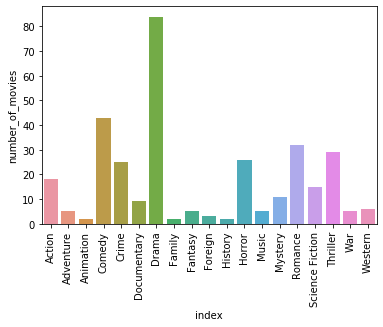

In [104]:
plt.xticks(rotation=90)
sns.barplot(data = low_genres_sum.reset_index(), x = 'index', y = 'number_of_movies')

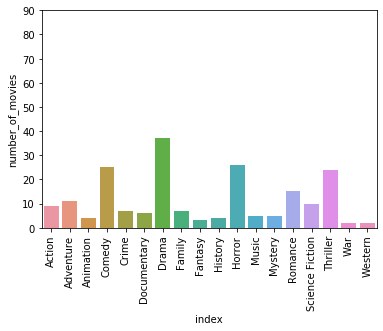

In [105]:
plt.ylim(0, 90)
plt.xticks(rotation=90)
sns.barplot(data = high_genres_sum.reset_index(), x = 'index', y = 'number_of_movies')

In [106]:
genre_numbers_df = high_genres_sum.reset_index().merge(low_genres_sum.reset_index(), on = 'index', suffixes = ('_high_roi', '_low_roi'))
genre_numbers_df.head()

,index,number_of_movies_high_roi,number_of_movies_low_roi
0,Action,9,18
1,Adventure,11,5
2,Animation,4,2
3,Comedy,25,43
4,Crime,7,25


In [107]:
genre_numbers_df['percent_movies_high_roi'] = genre_numbers_df['number_of_movies_high_roi']/(genre_numbers_df['number_of_movies_high_roi']+genre_numbers_df['number_of_movies_low_roi'])

In [108]:
genre_numbers_df.head()

,index,number_of_movies_high_roi,number_of_movies_low_roi,percent_movies_high_roi
0,Action,9,18,0.333333
1,Adventure,11,5,0.6875
2,Animation,4,2,0.666667
3,Comedy,25,43,0.367647
4,Crime,7,25,0.21875


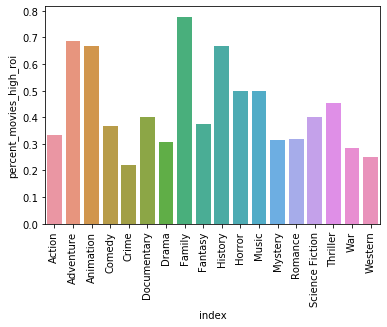

In [109]:
#plt.ylim(0, 90)
plt.xticks(rotation=90)
sns.barplot(data = genre_numbers_df.reset_index(), x = 'index', y = 'percent_movies_high_roi')

In [110]:
high_keywords_list = []
for row in high_roi_df['keywords']:
    for item in row:
        high_keywords_list.append(item)
        
high_keywords_list = sorted(list(set(high_keywords_list)))

In [112]:
len(high_keywords_list)

816

In [113]:
high_keywords_df = pd.DataFrame(high_roi_df['keywords'])
high_keywords_df.head()

,keywords
1108,"[italy, lie, magic, fairy, pinocchio, carnival..."
1990,"[rebel, android, asteroid, space battle, snow ..."
2170,"[hotel, clerk, arizona, shower, rain, motel, m..."
2409,"[female nudity, nudity, mask, babysitter, hall..."
2511,"[holiday, burglar, home invasion, mischief, bo..."


In [114]:
for col in high_keywords_list:
    high_keywords_df[col] = 0

In [115]:
high_keywords_df.head()

,keywords,1930s,1940s,1960s,20th century,adopted child,adult humor,advice,aftercreditsstinger,age difference,...,wookie,workaholic,world champion,world war i,world war ii,wrong side of the tracks,xenophobia,yuppie,zagreb,zombie
1108,"[italy, lie, magic, fairy, pinocchio, carnival...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,"[rebel, android, asteroid, space battle, snow ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2170,"[hotel, clerk, arizona, shower, rain, motel, m...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2409,"[female nudity, nudity, mask, babysitter, hall...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2511,"[holiday, burglar, home invasion, mischief, bo...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
for row in high_keywords_df.index:
    for word in high_keywords_list:
        if word in high_keywords_df['keywords'][row]:
            high_keywords_df[word][row] = 1

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [121]:
high_keywords_df.head()

,keywords,1930s,1940s,1960s,20th century,adopted child,adult humor,advice,aftercreditsstinger,age difference,...,wookie,workaholic,world champion,world war i,world war ii,wrong side of the tracks,xenophobia,yuppie,zagreb,zombie
1108,"[italy, lie, magic, fairy, pinocchio, carnival...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,"[rebel, android, asteroid, space battle, snow ...",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2170,"[hotel, clerk, arizona, shower, rain, motel, m...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2409,"[female nudity, nudity, mask, babysitter, hall...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2511,"[holiday, burglar, home invasion, mischief, bo...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
high_keywords_sum = pd.DataFrame(high_keywords_df.sum(), columns = ['number_of_movies'])
high_keywords_sum.drop(['keywords'], inplace = True)
high_keywords_sum.sort_values(by = ['number_of_movies'], ascending = False).head(20)

,number_of_movies
found footage,9
independent film,8
teenager,6
aftercreditsstinger,6
demonic possession,5
duringcreditsstinger,5
nudity,4
death,4
secret organization,4
love of one's life,4


In [132]:
high_roi_df['release_date'].dt.year.mean()

1987.131868131868

In [133]:
low_roi_df['release_date'].dt.year.mean()

1988.5724137931034

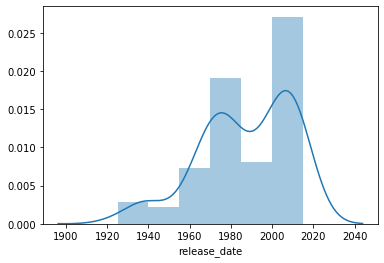

In [147]:
sns.distplot(high_roi_df['release_date'].dt.year)

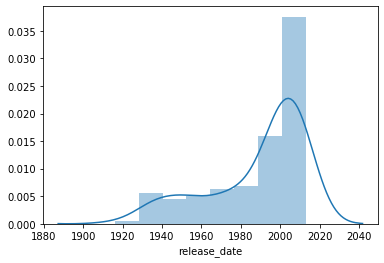

In [135]:
sns.distplot(low_roi_df['release_date'].dt.year)

In [136]:
recent_high_roi_df = high_roi_df[high_roi_df['release_date'].dt.year > 1999]

In [141]:
recent_genres_high_df = pd.DataFrame(recent_high_roi_df['genres'])

In [143]:
r_g_list = []
for row in recent_genres_high_df.index:
    for item in recent_genres_high_df['genres'][row]:
        r_g_list.append(item)
        
set(r_g_list)

{'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller'}

In [144]:
recent_low_roi_df = low_roi_df[low_roi_df['release_date'].dt.year > 1999]
recent_genres_low_df = pd.DataFrame(recent_low_roi_df['genres'])
l_r_g_list = []
for row in recent_genres_low_df.index:
    for item in recent_genres_low_df['genres'][row]:
        l_r_g_list.append(item)
        
set(l_r_g_list)

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller'}

In [149]:


for col in l_r_g_list:
    recent_genres_low_df[col] = 0
    
for col in r_g_list:
    recent_genres_high_df[col] = 0

In [150]:
recent_genres_high_df.head()

,genres,Drama,History,Romance,Thriller,Horror,Comedy,Crime,Science Fiction,Mystery,Documentary,Music
2517,"[Drama, History]",0,0,0,0,0,0,0,0,0,0,0
2666,"[Drama, Romance]",0,0,0,0,0,0,0,0,0,0,0
2730,"[Drama, Thriller]",0,0,0,0,0,0,0,0,0,0,0
2838,"[Romance, Drama]",0,0,0,0,0,0,0,0,0,0,0
3137,"[Horror, Thriller]",0,0,0,0,0,0,0,0,0,0,0


In [151]:
for row in recent_genres_high_df.index:
    for genre in r_g_list:
        if genre in recent_genres_high_df['genres'][row]:
            recent_genres_high_df[genre][row] = 1

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [152]:
for row in recent_genres_low_df.index:
    for genre in l_r_g_list:
        if genre in recent_genres_low_df['genres'][row]:
            recent_genres_low_df[genre][row] = 1

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
